In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

pd.set_option('display.max_columns', None)  # Отображать все колонки
# pd.set_option('display.max_rows', None)  

## Акции / Облигации (investing.com)

In [3]:
gold_path = 'Прошлые данные - Фьючерс на золото.csv'
brent_path = 'Прошлые данные - Фьючерс на нефть Brent.csv'
svoe_path = 'Прошлые данные - CBOE Volatility Index.csv'
gazp_path = 'Прошлые данные - GAZP.csv' 
lkoh_path = 'Прошлые данные - LKOH.csv'
plzl_path = 'Прошлые данные - PLZL.csv'
sp500_path = 'Прошлые данные - S&P 500.csv'
sber_path = 'Прошлые данные - SBER.csv'
sngs_path = 'Прошлые данные - SNGS.csv'
tath_path = 'Прошлые данные - TATN.csv'
ydex_path = 'Прошлые данные - YDEX.csv'
bond3_path = 'Прошлые данные доходности облигаций Россия 3-летние.csv'
bond5_path = 'Прошлые данные доходности облигаций Россия 5-летние.csv'
bond1_path = 'Прошлые данные доходности облигаций Россия годовые.csv'

In [4]:
def stock_bonds(file_path):
    df = pd.read_csv(file_path)
    
    df['Дата'] = pd.to_datetime(df['Дата'], format='%d.%m.%Y', dayfirst=True)

    if 'Объём' in df.columns and 'Изм. %' in df.columns:
        df.drop(['Объём', 'Изм. %'], axis=1, inplace=True)
    elif 'Изм. %' in df.columns:
        df.drop(['Изм. %'], axis=1, inplace=True)
        
    df.set_index('Дата', inplace=True)
    
    return df

In [5]:
gold = stock_bonds(gold_path)
brent = stock_bonds(brent_path)
svoe = stock_bonds(svoe_path)
gazp = stock_bonds(gazp_path)
lkoh = stock_bonds(lkoh_path)
plzl = stock_bonds(plzl_path)
sp500 = stock_bonds(sp500_path)
sber = stock_bonds(sber_path)
sngs = stock_bonds(sngs_path)
tath = stock_bonds(tath_path)
ydex = stock_bonds(ydex_path)

bond3 = stock_bonds(bond3_path)
bond5 = stock_bonds(bond5_path)
bond1 = stock_bonds(bond1_path)

## Валюта ЦБ

In [7]:
ruble_to_doll_path = 'Доллар_рубль_ЦБ.xlsx'
ruble_to_euro_path = 'Евро_рубль_ЦБ.xlsx'

In [8]:
def currency(file_path):
    df = pd.read_excel(file_path)
    
    df['Дата'] = pd.to_datetime(df['data'], format='%Y.%m.%d')
    
    df.set_index('Дата', inplace=True)

    df.drop(['cdx', 'data', 'nominal'], axis=1, inplace=True)
    
    return df

In [9]:
ruble_to_doll = currency(ruble_to_doll_path)
ruble_to_euro = currency(ruble_to_euro_path)

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## Инфляция и ключевая ставка ЦБ

In [11]:
inflation_and_key_rate_path = 'Инфляция и ключевая ставка ЦБ.xlsx'

In [12]:
def inflation_and_key_rate_monthly_data(file_path):
    df = pd.read_excel(file_path, dtype={'Дата': str})
    
    df['Дата'] = df['Дата'].astype(str)
    
    # Преобразование в datetime, указывая последний день месяца
    df['Дата'] = pd.to_datetime(df['Дата'], format='%m.%Y').dt.to_period('M').dt.to_timestamp(how='end').dt.floor('D')
    
    df.set_index('Дата', inplace=True)

    df.drop('Цель по инфляции', axis=1, inplace=True)
    
    return df

In [13]:
inflation_and_key_rate = inflation_and_key_rate_monthly_data(inflation_and_key_rate_path)

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## MOEX

In [15]:
imoex_path = 'IMOEX.csv'
moex_blue_chips_path = 'MOEX_blue_chips.csv'
rtsi_path = 'RTSI.csv'

In [16]:
def moex(file_path):
    df = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';', skiprows=2)
    
    df = df[['TRADEDATE', 'CLOSE', 'OPEN', 'HIGH', 'LOW']]
    
    df['Дата'] = pd.to_datetime(df['TRADEDATE'], format='%d.%m.%Y', dayfirst=True)

    df.set_index('Дата', inplace=True)

    df.drop('TRADEDATE', axis=1, inplace=True)

    df = df.replace(',', '.', regex=True).apply(pd.to_numeric, errors='coerce')

    return df

In [17]:
imoex = moex(imoex_path)
moex_blue_chips = moex(moex_blue_chips_path)
rtsi = moex(rtsi_path)

In [18]:

# gold 
# brent 
# svoe
# gazp
# lkoh
# plzl
# sp500
# sber 
# sngs 
# tath 
# ydex 

# bond3
# bond5 
# bond1 

# ruble_to_doll 
# ruble_to_euro

# inflation_and_key_rate

# imoex 
# moex_blue_chips
# rtsi

## Обработка дубликатов

In [20]:
# хочу добавить все датафреймы в словарь, из них в каждом датафрейме удалить дубликаты, а далее сложить все в один датафрейм

In [21]:
dataframes = {
    'gold': gold,
    'brent': brent,
    'svoe': svoe,
    'gazp': gazp,
    'lkoh': lkoh,
    'plzl': plzl,
    'sp500': sp500,
    'sber': sber,
    'sngs': sngs,
    'tath': tath,
    'ydex': ydex,
    'bond3': bond3,
    'bond5': bond5,
    'bond1': bond1,
    'ruble_to_doll': ruble_to_doll,
    'ruble_to_euro': ruble_to_euro,
    'inflation_and_key_rate': inflation_and_key_rate,
    'imoex': imoex,
    'moex_blue_chips': moex_blue_chips,
    'rtsi': rtsi
}

In [22]:
df_names = [
    "gold", "brent", "svoe", "gazp", "lkoh", "plzl", "sp500", "sber", "sngs", "tath", "ydex",
    "bond3", "bond5", "bond1",
    "ruble_to_doll", "ruble_to_euro",
    "inflation_and_key_rate",
    "imoex", "moex_blue_chips", "rtsi"
]

duplicate_counts = {}

for name in df_names:
    df = dataframes[name]
    duplicate_counts[name] = df.index.duplicated().sum()

# Создаем сводную таблицу
summary_df = pd.DataFrame(list(duplicate_counts.items()), columns=["DataFrame", "Duplicate Count"])

# Выводим таблицу
print(summary_df.sort_values(by="Duplicate Count", ascending=False))


                 DataFrame  Duplicate Count
3                     gazp               11
7                     sber               10
0                     gold                0
11                   bond3                0
18         moex_blue_chips                0
17                   imoex                0
16  inflation_and_key_rate                0
15           ruble_to_euro                0
14           ruble_to_doll                0
13                   bond1                0
12                   bond5                0
10                    ydex                0
1                    brent                0
9                     tath                0
8                     sngs                0
6                    sp500                0
5                     plzl                0
4                     lkoh                0
2                     svoe                0
19                    rtsi                0


In [23]:
for name in ['gazp', 'sber']:
    df = dataframes[name].copy()  # Создаём копию, чтобы избежать неожиданных изменений
    df = df.loc[~df.index.duplicated(keep='first')]  # Удаляем дубликаты, оставляя первое вхождение
    dataframes[name] = df  # Обновляем датафрейм в словаре

# Проверяем, что дубликатов больше нет
for name in ['gazp', 'sber']:
    df = dataframes[name]
    print(f"{name} — уникальных дат: {df.index.nunique()}, всего строк: {len(df)}")

gazp — уникальных дат: 2259, всего строк: 2259
sber — уникальных дат: 2259, всего строк: 2259


In [24]:
gazp.index.duplicated().sum()

11

In [25]:
dataframes['gazp'].index.duplicated().sum()

0

## Растягиваем помесячные данные на каждый день месяца

In [27]:
# inflation_and_key_rate = inflation_and_key_rate.resample('D').ffill()
# inflation_and_key_rate.sort_index().shape

dataframes['inflation_and_key_rate'] = inflation_and_key_rate.resample('D').ffill().copy()
print(dataframes['inflation_and_key_rate'].sort_index().shape)
dataframes['inflation_and_key_rate']

(3259, 2)


,"Ключевая ставка, % годовых","Инфляция, % г/г"
Дата,,
2015-11-30,11.0,15.00
2015-12-01,11.0,15.00
2015-12-02,11.0,15.00
2015-12-03,11.0,15.00
2015-12-04,11.0,15.00
...,...,...
2024-10-27,19.0,8.63
2024-10-28,19.0,8.63
2024-10-29,19.0,8.63


## Определяем датафрейм с максимальным кол-вом строк

In [29]:
df_names = [
    "gold", "brent", "svoe", "gazp", "lkoh", "plzl", "sp500", "sber", "sngs", "tath", "ydex",
    "bond3", "bond5", "bond1",
    "ruble_to_doll", "ruble_to_euro",
    "inflation_and_key_rate",
    "imoex", "moex_blue_chips", "rtsi"
]

duplicate_counts = {}

for name in df_names:
    df = dataframes[name]
    duplicate_counts[name] = len(df)

# Создаем сводную таблицу
summary_df = pd.DataFrame(list(duplicate_counts.items()), columns=["DataFrame", "Duplicate Count"])

# Выводим таблицу
print(summary_df.sort_values(by="Duplicate Count", ascending=False))

                 DataFrame  Duplicate Count
16  inflation_and_key_rate             3259
1                    brent             2325
0                     gold             2313
2                     svoe             2295
6                    sp500             2266
17                   imoex             2261
19                    rtsi             2260
7                     sber             2259
3                     gazp             2259
18         moex_blue_chips             2257
8                     sngs             2253
9                     tath             2253
5                     plzl             2253
4                     lkoh             2253
10                    ydex             2230
14           ruble_to_doll             2223
15           ruble_to_euro             2223
12                   bond5             2216
13                   bond1             2210
11                   bond3             2207


## Объединяем все df

In [31]:
combined_df = dataframes['brent'].rename(columns=lambda col: f"brent_{col}")

for name, df in dataframes.items():
    if name == 'brent':
        continue  # Пропускаем, т.к. он уже в основе
    df = df.add_prefix(f'{name}_')
    combined_df = combined_df.join(df, how='left')


In [32]:
combined_df = combined_df.sort_index()

In [33]:
df = combined_df.copy()

In [34]:
print("Размерность датафрейма:")
print(df.shape)
print()
missing_values_count = df.isna().sum()  # Общее количество пропущенных значений
missing_values_percentage = (df.isna().mean() * 100).round(2)  # Процент пропущенных значений
unique_values_count = df.nunique()  # Количество уникальных значений в каждом столбце

missing_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage,
    'Unique Values Count': unique_values_count
})

print("Сводка по отсутствующим значениям и уникальным значениям:")
missing_summary.sort_values('Missing Values Count', ascending=False)

Размерность датафрейма:
(2325, 72)

Сводка по отсутствующим значениям и уникальным значениям:


,Missing Values Count,Missing Values Percentage,Unique Values Count
ruble_to_euro_curs,568,24.43,1756
ruble_to_doll_curs,568,24.43,1751
bond3_Мин.,172,7.40,701
bond3_Макс.,172,7.40,723
bond3_Откр.,172,7.40,726
...,...,...,...
gold_Цена,12,0.52,1994
brent_Макс.,0,0.00,1932
brent_Откр.,0,0.00,1941
brent_Мин.,0,0.00,1923


## Исправление проблем в df

In [36]:
# Обработать Nan через интерполяцию и выкидывание столбцов
# Когда биржа не работала не заполнять
# На день прогнозировать неинтересно, надо на неделю, то есть смещать на 5 дней
# Отсутствующие данные либо выкинуть либо интерполяция, замена средним

In [37]:
print(ruble_to_doll.index.intersection(brent.index).size)

1757


### Фиксим запятые и точки

In [39]:
def normalize_numbers(x):
    if isinstance(x, str):
        # Случай 1: запятая как десятичный разделитель (1.073,80 → 1073.80)
        if '.' in x and ',' in x:
            return x.replace('.', '').replace(',', '.')
        
        # # Случай 2: точка как десятичный разделитель (10,280 → 10.280)
        # elif ',' in x and x.count(',') == 1:
        #     return x.replace(',', '')
        
        # Случай 3: только запятая как десятичный разделитель
        elif ',' in x:
            return x.replace(',', '.')
    return x

# Применяем ко всем столбцам
df = df.map(normalize_numbers)


### Преобразуем все колонки df в float

In [41]:
df = df.map(lambda x: pd.to_numeric(x, errors='coerce'))

In [42]:
# проверил методом пристального взгляда, вроде все ок и новых nan не стало 

### 568 Nan в ruble_to_dollar и brent

In [44]:
# Это просто так собраны данные? 

In [45]:
# Пока что дропнем эти колонки где много NaN

In [46]:
# df = df.drop(['ruble_to_doll_curs', 'ruble_to_euro_curs'], axis=1)

## 1. Заполнение отсутствующих значений

In [48]:
print("Размерность датафрейма:")
print(df.shape)
print()
missing_values_count = df.isna().sum()  # Общее количество пропущенных значений
missing_values_percentage = (df.isna().mean() * 100).round(2)  # Процент пропущенных значений
unique_values_count = df.nunique()  # Количество уникальных значений в каждом столбце

missing_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage,
    'Unique Values Count': unique_values_count
})

print("Сводка по отсутствующим значениям и уникальным значениям:")
missing_summary.sort_values('Missing Values Count', ascending=False).iloc[:20]

Размерность датафрейма:
(2325, 72)

Сводка по отсутствующим значениям и уникальным значениям:


,Missing Values Count,Missing Values Percentage,Unique Values Count
ruble_to_euro_curs,568,24.43,1756
ruble_to_doll_curs,568,24.43,1751
bond3_Мин.,172,7.40,701
bond3_Макс.,172,7.40,723
bond3_Откр.,172,7.40,726
bond3_Цена,172,7.40,730
bond1_Макс.,170,7.31,882
bond1_Откр.,170,7.31,865
bond1_Цена,170,7.31,868
bond1_Мин.,170,7.31,850


In [49]:
df.columns

Index(['brent_Цена', 'brent_Откр.', 'brent_Макс.', 'brent_Мин.', 'gold_Цена',
       'gold_Откр.', 'gold_Макс.', 'gold_Мин.', 'svoe_Цена', 'svoe_Откр.',
       'svoe_Макс.', 'svoe_Мин.', 'gazp_Цена', 'gazp_Откр.', 'gazp_Макс.',
       'gazp_Мин.', 'lkoh_Цена', 'lkoh_Откр.', 'lkoh_Макс.', 'lkoh_Мин.',
       'plzl_Цена', 'plzl_Откр.', 'plzl_Макс.', 'plzl_Мин.', 'sp500_Цена',
       'sp500_Откр.', 'sp500_Макс.', 'sp500_Мин.', 'sber_Цена', 'sber_Откр.',
       'sber_Макс.', 'sber_Мин.', 'sngs_Цена', 'sngs_Откр.', 'sngs_Макс.',
       'sngs_Мин.', 'tath_Цена', 'tath_Откр.', 'tath_Макс.', 'tath_Мин.',
       'ydex_Цена', 'ydex_Откр.', 'ydex_Макс.', 'ydex_Мин.', 'bond3_Цена',
       'bond3_Откр.', 'bond3_Макс.', 'bond3_Мин.', 'bond5_Цена', 'bond5_Откр.',
       'bond5_Макс.', 'bond5_Мин.', 'bond1_Цена', 'bond1_Откр.', 'bond1_Макс.',
       'bond1_Мин.', 'ruble_to_doll_curs', 'ruble_to_euro_curs',
       'inflation_and_key_rate_Ключевая ставка, % годовых',
       'inflation_and_key_rate_Инфля

In [50]:
df['lkoh_Цена'].isna().sum()

96

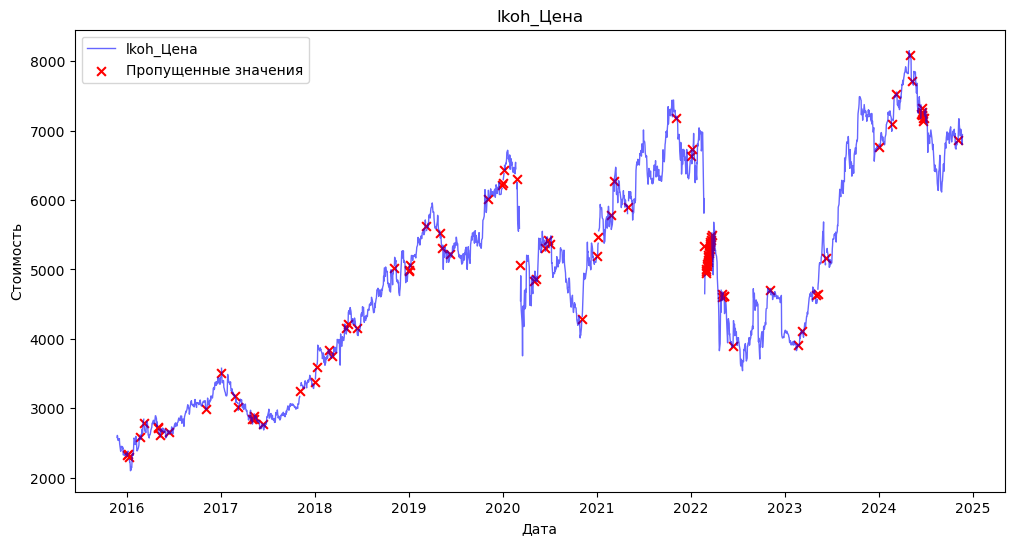

In [51]:
col = 'lkoh_Цена'

plt.figure(figsize=(12,6))
plt.plot(df[col], label=col, color='blue', alpha=0.6, linewidth=1)

# Отображение пропущенных значений
nan_indices = df[col].isna()
plt.scatter(df.index[nan_indices], df[col].interpolate()[nan_indices], 
            marker='x', color='red', label='Пропущенные значения', s=40)

plt.title(col)
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.legend()
plt.show()

По рос акциям чуть позже начала 2020 года и чуть позже начала 2022 какая то лютая проблема с Nan - оч много идет подряд \
Пока что имеет смысл дропнуть яндекс и рос гос облигации

In [53]:
drop_cols = ['ydex', 'bond3', 'bond5', 'bond1', 'ruble_to_doll', 'ruble_to_euro']
df = df.drop(columns=[col for col in df.columns if any(word in col for word in drop_cols)])

### Интерполяция

In [55]:
# df['lkoh_Цена'] = df['lkoh_Цена'].interpolate(method='linear') # Использует две соседние точки
# df['lkoh_Цена'] = df['lkoh_Цена'].interpolate(method='spline', order=2) # использует весь набор данных
# df['lkoh_Цена'] = df['lkoh_Цена'].fillna(method='ffill') # заполнение предыдущим значением

In [56]:
df['lkoh_Цена'] = df['lkoh_Цена'].interpolate(method='linear') # Использует две соседние точки

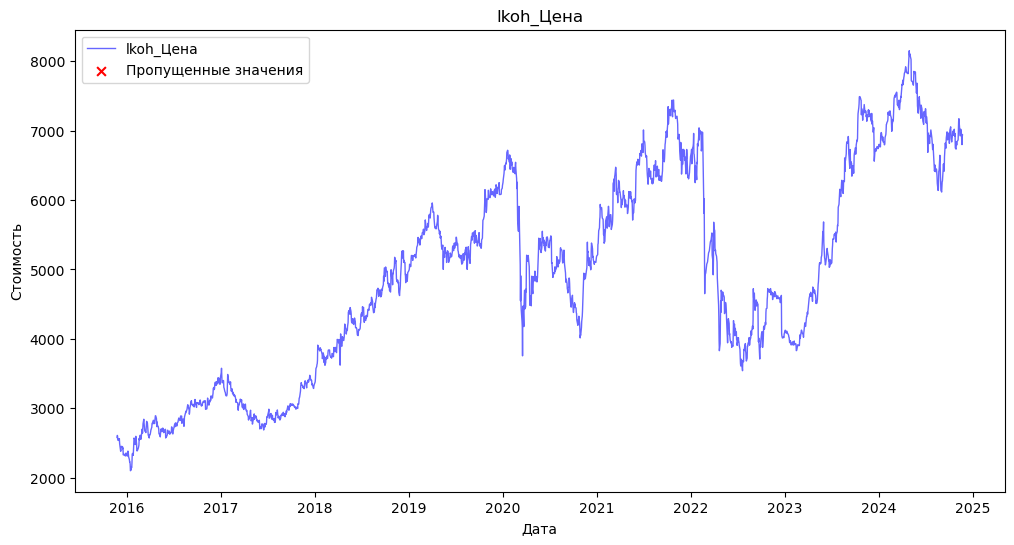

In [57]:
col = 'lkoh_Цена'

plt.figure(figsize=(12,6))
plt.plot(df[col], label=col, color='blue', alpha=0.6, linewidth=1)

# Отображение пропущенных значений
nan_indices = df[col].isna()
plt.scatter(df.index[nan_indices], df[col].interpolate()[nan_indices], 
            marker='x', color='red', label='Пропущенные значения', s=40)

plt.title(col)
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.legend()
plt.show()

In [58]:
for i in df.columns:
    df[i] = df[i].interpolate(method='linear') # Использует две соседние точки

### bfill

In [60]:
df.columns[df.isna().any()].tolist()

['inflation_and_key_rate_Ключевая ставка, % годовых',
 'inflation_and_key_rate_Инфляция, % г/г']

In [61]:
# df[['inflation_and_key_rate_Инфляция, % г/г', 'inflation_and_key_rate_Ключевая ставка, % годовых']]

In [62]:
# Заполняю оставшиеся значения (их было 4) просто методом bfill
# Для этих значений просто самая первая строка временного ряда была тоже NaN и интерполяция не помогла

for i in df.columns[df.isna().any()].tolist():
    df[i] = df[i].bfill() # заполнение предыдущим значением

In [63]:
# df[['inflation_and_key_rate_Инфляция, % г/г', 'inflation_and_key_rate_Ключевая ставка, % годовых']]

In [64]:
# print("Размерность датафрейма:")
# print(df.shape)
# print()
# missing_values_count = df.isna().sum()  # Общее количество пропущенных значений
# missing_values_percentage = (df.isna().mean() * 100).round(2)  # Процент пропущенных значений
# unique_values_count = df.nunique()  # Количество уникальных значений в каждом столбце

# missing_summary = pd.DataFrame({
#     'Missing Values Count': missing_values_count,
#     'Missing Values Percentage': missing_values_percentage,
#     'Unique Values Count': unique_values_count
# })

# print("Сводка по отсутствующим значениям и уникальным значениям:")
# missing_summary.sort_values('Missing Values Count', ascending=False)

## Реализованная волатильность

In [66]:
# Этот код рассчитывает логарифмическую доходность для каждого индекса. 
# Логарифмическая доходность используется вместо простой разницы, чтобы сделать данные более нормально распределенными и облегчить последующие расчеты.

df['imoex_ret'] = np.log(df['imoex_CLOSE'] / df['imoex_CLOSE'].shift(1))
df['moex_blue_chips_ret'] = np.log(df['moex_blue_chips_CLOSE'] / df['moex_blue_chips_CLOSE'].shift(1))
df['rtsi_ret'] = np.log(df['rtsi_CLOSE'] / df['rtsi_CLOSE'].shift(1))

# Волатильность рассчитывается как квадрат доходности. Это основано на концепции Realized Volatility (RV), 
# которая является мерой исторической волатильности.

df['imoex_RV'] = df['imoex_ret']**2
df['moex_blue_chips_RV'] = df['moex_blue_chips_ret']**2
df['rtsi_RV'] = df['rtsi_ret']**2

# Скользящая сумма используется для агрегации волатильности за определенный период (в данном случае 5 дней). 
# Это позволяет учитывать историческую волатильность за неделю, что может быть полезно для прогнозирования будущей волатильности.

df['imoex_RV_weekly'] = df['imoex_RV'].rolling(5).sum()
df['moex_blue_chips_RV_weekly'] = df['moex_blue_chips_RV'].rolling(5).sum()
df['rtsi_RV_weekly'] = df['rtsi_RV'].rolling(5).sum()

# Скользящая сумма используется для агрегации волатильности за определенный период (в данном случае 5 дней). 
# Это позволяет учитывать историческую волатильность за неделю, что может быть полезно для прогнозирования будущей волатильности.

df['imoex_RV_target'] = df['imoex_RV_weekly'].shift(-5)
# df['moex_blue_chips_RV_target'] = df['moex_blue_chips_RV_weekly'].shift(-5)
# df['rtsi_RV_target'] = df['rtsi_RV_weekly'].shift(-5)

# раскомментировать если буду проверять на другом индексе 

In [67]:
# df = df.dropna(subset=['imoex_RV_target'])

In [68]:
df = df.dropna()

## Expanding Window Validation

In [70]:
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# from tqdm import tqdm

# def rolling_window_validation(df, test_size=10, window_size=1000, n_estimators_start=10, n_estimators_step=5):
#     assert test_size % 5 == 0, "test_size должен быть кратен 5"

#     train_size = len(df) - test_size
#     X = df.drop(['imoex_RV_target'], axis=1)
#     y = df['imoex_RV_target']

#     errors = []
#     model = RandomForestRegressor(n_estimators=n_estimators_start, random_state=42, warm_start=True, n_jobs=-1)

#     # Итеративное тестирование
#     for i in tqdm(range(window_size, train_size, 5), desc="Обучение модели"):
#         X_train = X[i-window_size:i]
#         y_train = y[i-window_size:i]

#         X_test = X[i:i+5]
#         y_test = y[i:i+5]

#         if len(X_test) < 5:
#             break

#         # Увеличиваем количество деревьев
#         model.n_estimators += n_estimators_step  
#         model.fit(X_train, y_train)

#         # Предсказания
#         y_pred = model.predict(X_test)

#         # Оценка ошибки
#         mse = mean_squared_error(y_test, y_pred)
#         errors.append(mse)

#     return errors

In [71]:
# errors = rolling_window_validation(df, test_size=10, window_size=1000, n_estimators_start=500, n_estimators_step=5)

In [72]:
# np.mean(errors)

## All Window Validation

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Добавляем MAE
from tqdm import tqdm
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [75]:
def walk_forward_validation(df, test_size=5, n_estimators_start=750, n_estimators_step=20):  # Старт с 750
    assert test_size % 5 == 0, "test_size должен быть кратен 5"

    train_size = len(df) - test_size
    X = df.drop(['imoex_RV_target'], axis=1)
    y = df['imoex_RV_target']

    initial_train_size = int(train_size * 0.9)
    X_train = X[:initial_train_size]
    y_train = y[:initial_train_size]

    mse_errors = []  # Переименовываем errors
    mae_errors = []  # Новый массив для MAE
    model = RandomForestRegressor(n_estimators=n_estimators_start, random_state=42, 
                                warm_start=True, n_jobs=-1)

    for i in tqdm(range(initial_train_size, train_size, 5), desc="Обучение модели"):
        X_test = X[i:i+5]
        y_test = y[i:i+5]

        if len(X_test) < 5:
            break

        model.n_estimators += n_estimators_step
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        # Рассчитываем обе ошибки
        mse_errors.append(mean_squared_error(y_test, y_pred))
        mae_errors.append(mean_absolute_error(y_test, y_pred))  # Добавляем MAE

        X_train = pd.concat([X_train, X_test])
        y_train = pd.concat([y_train, y_test])

    return mse_errors, mae_errors  # Возвращаем оба массива


In [76]:
# mse_scores, mae_scores = walk_forward_validation(df, test_size=5, n_estimators_start=750, n_estimators_step=20)
# print(f"Средний RMSE: {np.sqrt(np.mean(mse_scores))}")
# print(f"Средний MAE: {np.mean(mae_scores)}")

In [77]:
# plt.plot(np.sqrt(mse_scores), label='MSE')
# plt.plot(mae_scores, label='MAE')
# plt.legend()
# plt.title('Динамика ошибок на прогнозном горизонте')
# ;

In [78]:
np.mean(df['imoex_RV_target'])

0.000979755632737716

In [79]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import numpy as np

# # Размер теста = 5
# test_size = 5
# train_size = len(df) - test_size

# # Разделяем данные
# X = df.drop(['imoex_RV_target'], axis=1)
# y = df['imoex_RV_target']

# X_train_full = X[:train_size]
# y_train_full = y[:train_size]

# X_final_test = X[train_size:]
# y_final_test = y[train_size:]

# # Вычисляем, сколько шагов было бы сделано в walk-forward
# steps = (train_size - int(train_size * 0.9)) // 5
# final_estimators = 700 + 20 * steps  # соответствие параметрам из вызова

# # Обучаем модель на всех тренировочных данных
# final_model = RandomForestRegressor(
#     n_estimators=final_estimators,
#     random_state=42,
#     n_jobs=-1
# )
# final_model.fit(X_train_full, y_train_full)

# # Предсказания и метрики
# final_preds = final_model.predict(X_final_test)
# final_mse = mean_squared_error(y_final_test, final_preds)
# final_mae = mean_absolute_error(y_final_test, final_preds)

# print(f"\n📌 Предсказания на последних 5 строках: {final_preds}")
# print(f"📉 RMSE на финальном тесте: {np.sqrt(final_mse)}")
# print(f"📉 MAE на финальном тесте: {final_mae}")


## Добавление фичей

1) RV(t-22)
2) Добавление LV(1), LV(3), LV(6) - бинарная переменная где 1 это цена акции ниже чем была 1, 3, 6, месяцев назад
3) добавить CSAD

**RV(t-22)**

In [83]:
df['imoex_RV_monthly'] = df['imoex_RV'].rolling(22).sum()
df['moex_blue_chips_RV_monthly'] = df['moex_blue_chips_RV'].rolling(22).sum()
df['rtsi_RV_monthly'] = df['rtsi_RV'].rolling(22).sum()

**LV(1) LV(3) LV(6)**

In [85]:
mass = ['brent_Цена', 'gold_Цена', 'svoe_Цена', 'gazp_Цена', 'lkoh_Цена', 'plzl_Цена',
'sber_Цена', 'sngs_Цена', 'tath_Цена', 'imoex_CLOSE', 'moex_blue_chips_CLOSE',
'rtsi_CLOSE']

In [86]:
for col in mass:
    new_col_name = f'LV_{col.split("_")[0]}_one_month'
    df[new_col_name] = np.where(df[col] < df[col].shift(22), 1, 0)

for col in mass:
    new_col_name = f'LV_{col.split("_")[0]}_three_month'
    df[new_col_name] = np.where(df[col] < df[col].shift(66), 1, 0)

for col in mass:
    new_col_name = f'LV_{col.split("_")[0]}_six_month'
    df[new_col_name] = np.where(df[col] < df[col].shift(132), 1, 0)

C:\Users\MadBoss\AppData\Local\Temp\ipykernel_15144\3573950744.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = np.where(df[col] < df[col].shift(132), 1, 0)
C:\Users\MadBoss\AppData\Local\Temp\ipykernel_15144\3573950744.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = np.where(df[col] < df[col].shift(132), 1, 0)
C:\Users\MadBoss\AppData\Local\Temp\ipykernel_15144\3573950744.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert

**CSAD**

In [88]:
def calculate_csad(df, stocks):
    # Создайте промежуточные столбцы для логарифмических доходностей
    for stock in stocks:
        df[f'{stock}_ret'] = np.log(df[stock] / df[stock].shift(1))

    # Рассчитайте среднерыночную доходность
    df['market_return'] = df[[f'{stock}_ret' for stock in stocks]].mean(axis=1)

    # Рассчитайте абсолютные отклонения от среднерыночной доходности
    for stock in stocks:
        df[f'{stock}_abs_dev'] = np.abs(df[f'{stock}_ret'] - df['market_return'])

    # Рассчитайте CSAD
    df['csad'] = df[[f'{stock}_abs_dev' for stock in stocks]].mean(axis=1)

    # Удалите промежуточные столбцы
    df.drop([f'{stock}_ret' for stock in stocks] + [f'{stock}_abs_dev' for stock in stocks] + ['market_return'], axis=1, inplace=True)

    return df

In [89]:
stocks = ['brent_Цена', 'gold_Цена', 'svoe_Цена', 'gazp_Цена', 'lkoh_Цена', 'plzl_Цена',
          'sber_Цена', 'sngs_Цена', 'tath_Цена']

df = calculate_csad(df, stocks)

C:\Users\MadBoss\AppData\Local\Temp\ipykernel_15144\1657683320.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{stock}_ret'] = np.log(df[stock] / df[stock].shift(1))
C:\Users\MadBoss\AppData\Local\Temp\ipykernel_15144\1657683320.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{stock}_ret'] = np.log(df[stock] / df[stock].shift(1))
C:\Users\MadBoss\AppData\Local\Temp\ipykernel_15144\1657683320.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

In [90]:
df = df.dropna()

In [91]:
mse_scores, mae_scores = walk_forward_validation(df, test_size=5, n_estimators_start=1000, n_estimators_step=20)
print(f"Средний RMSE: {np.sqrt(np.mean(mse_scores))}")
print(f"Средний MAE: {np.mean(mae_scores)}")

Обучение модели: 100%|██████████| 46/46 [00:56<00:00,  1.23s/it]

Средний RMSE: 0.0032313374629312553
Средний MAE: 0.0016619089696079726


**Почему то доп фичи только ухудшили ситуацию**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Размер теста = 5
test_size = 5
train_size = len(df) - test_size

# Разделяем данные
X = df.drop(['imoex_RV_target'], axis=1)
y = df['imoex_RV_target']

X_train_full = X[:train_size]
y_train_full = y[:train_size]

X_final_test = X[train_size:]
y_final_test = y[train_size:]

# Вычисляем, сколько шагов было бы сделано в walk-forward
steps = (train_size - int(train_size * 0.9)) // 5
final_estimators = 700 + 20 * steps  # соответствие параметрам из вызова

# Обучаем модель на всех тренировочных данных
final_model = RandomForestRegressor(
    n_estimators=final_estimators,
    random_state=42,
    n_jobs=-1
)
final_model.fit(X_train_full, y_train_full)

# Предсказания и метрики
final_preds = final_model.predict(X_final_test)
final_mse = mean_squared_error(y_final_test, final_preds)
final_mae = mean_absolute_error(y_final_test, final_preds)

print(f"\n📌 Предсказания на последних 5 строках: {final_preds}")
print(f"📉 RMSE на финальном тесте: {np.sqrt(final_mse)}")
print(f"📉 MAE на финальном тесте: {final_mae}")


## CatBoost

In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm
import pandas as pd

def walk_forward_validation_catboost(df, test_size=10, n_estimators_start=500, n_estimators_step=5):
    assert test_size % 5 == 0, "test_size должен быть кратен 5"

    train_size = len(df) - test_size
    X = df.drop(['imoex_RV_target'], axis=1)
    y = df['imoex_RV_target']

    initial_train_size = int(train_size * 0.9)
    X_train = X[:initial_train_size]
    y_train = y[:initial_train_size]

    mse_errors = []
    mae_errors = []

    current_estimators = n_estimators_start

    for i in tqdm(range(initial_train_size, train_size, 5), desc="Обучение модели (CatBoost)"):
        X_test = X[i:i+5]
        y_test = y[i:i+5]

        if len(X_test) < 5:
            break

        train_pool = Pool(X_train, y_train)
        test_pool = Pool(X_test)

        model = CatBoostRegressor(
            iterations=current_estimators,
            learning_rate=0.05,
            depth=6,
            verbose=False,
            random_seed=42
        )
        model.fit(train_pool)

        y_pred = model.predict(test_pool)

        mse_errors.append(mean_squared_error(y_test, y_pred))
        mae_errors.append(mean_absolute_error(y_test, y_pred))

        X_train = pd.concat([X_train, X_test])
        y_train = pd.concat([y_train, y_test])
        current_estimators += n_estimators_step

    return mse_errors, mae_errors


In [ ]:
mse_scores, mae_scores = walk_forward_validation_catboost(df, test_size=5, n_estimators_start=750, n_estimators_step=10)
print(f"Средний RMSE: {np.sqrt(np.mean(mse_scores))}")
print(f"Средний MAE: {np.mean(mae_scores)}")

In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Размер теста = 5
test_size = 5
train_size = len(df) - test_size

# Делим данные
X = df.drop(['imoex_RV_target'], axis=1)
y = df['imoex_RV_target']

X_train_full = X[:train_size]
y_train_full = y[:train_size]

X_final_test = X[train_size:]
y_final_test = y[train_size:]

# Вычисляем, сколько шагов было бы сделано в walk-forward
steps = (train_size - int(train_size * 0.9)) // 5
final_estimators = 100 + 10 * steps  # соответствие параметрам из вызова CatBoost

# Создаём пул для обучения
train_pool = Pool(X_train_full, y_train_full)
test_pool = Pool(X_final_test)

# Обучаем модель
final_model = CatBoostRegressor(
    iterations=final_estimators,
    learning_rate=0.05,
    depth=6,
    verbose=False,
    random_seed=42
)
final_model.fit(train_pool)

# Предсказания и метрики
final_preds = final_model.predict(test_pool)
final_mse = mean_squared_error(y_final_test, final_preds)
final_mae = mean_absolute_error(y_final_test, final_preds)

# Вывод
print(f"\n📌 Предсказания на последних 5 строках: {final_preds}")
print(f"📉 RMSE на финальном тесте: {np.sqrt(final_mse)}")
print(f"📉 MAE на финальном тесте: {final_mae}")


Что дальше?
1) Мне нужно добавить всякие переменные из MIDAS статьи
4) добавить скользящие окна по индексам и мб еще по чему то
6) использовать PCA и SNS для отбора признаков
8) модели HAR и GARCHt
9) надо писать парсеры

## Парсер к investing.com

In [ ]:
# !pip install selenium

In [ ]:
# from selenium import webdriver
# from selenium.webdriver.chrome.options import Options
# import time

# chrome_options = Options()
# # chrome_options.add_argument("--headless")  # Можешь временно отключить headless для проверки
# chrome_options.add_argument("--disable-gpu")
# chrome_options.add_argument("--no-sandbox")
# chrome_options.add_argument(
#     "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
# )


# driver = webdriver.Chrome(options=chrome_options)
# driver.get("https://ru.investing.com/equities/sberbank_rts-historical-data")

# # Подождём чуть больше (вдруг всё же грузится)
# time.sleep(5)

# # Печатаем первые 500 символов HTML
# print(driver.page_source[:500])

# driver.quit()


## Эконометрика - тесты

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf, pacf
from scipy.stats import shapiro

result = adfuller(df['imoex_RV_target'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


In [ ]:
# Проверка нормальности остатков
residuals = df['imoex_RV_target'] - df['imoex_RV_target'].mean()
stat, p = shapiro(residuals)
print('Shapiro-Wilk Statistic:', stat)
print('p-value:', p)

# Визуализация автокорреляции
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.acorr(df['imoex_RV_target'], maxlags=20)
plt.title('ACF')
plt.subplot(2,1,2)
plt.acorr(df['imoex_RV_target'], maxlags=20)
plt.title('PACF')
plt.tight_layout()
plt.show()